# __*PROBLEM 1*__

## IMPORT LIBRRIES

In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve


## 1. LOAD 'DATASET1.CSV'

In [3]:
data = np.loadtxt('dataset1.csv', skiprows=2, delimiter=',')
print(data)

[[ 5.857620e-01  2.286310e-01]
 [ 2.582272e+00  8.247210e-01]
 [ 1.233161e+00  6.896550e-01]
 [ 5.385980e-01  1.947110e-01]
 [-9.161420e-01  4.809800e-02]
 [ 1.750729e+00  1.016299e+00]
 [-7.489530e-01  4.185100e-02]
 [ 4.701276e+00  2.317000e-03]
 [ 5.563953e+00 -3.191200e-02]
 [-1.398702e+00  3.208600e-02]
 [ 3.500700e+00  2.107220e-01]
 [ 3.467390e-01  1.983460e-01]
 [ 8.165350e-01  3.993340e-01]
 [ 5.107160e+00  3.090200e-02]
 [-5.147567e+00  1.069100e-02]
 [-4.954448e+00  2.119700e-02]
 [-5.757379e+00  3.150000e-04]
 [ 3.991438e+00  1.246610e-01]
 [ 3.337881e+00  3.070310e-01]
 [ 4.440146e+00  3.094200e-02]
 [ 5.743420e+00  5.658200e-02]
 [ 3.589903e+00  1.449760e-01]
 [-4.622480e-01 -2.054800e-02]
 [ 3.366350e+00  3.171360e-01]
 [-4.580707e+00 -3.519400e-02]
 [ 1.679052e+00  9.919420e-01]
 [-4.279761e+00 -1.240900e-02]
 [ 5.336027e+00 -2.182400e-02]
 [ 2.621800e-01  1.912290e-01]
 [-1.024057e+00  4.666600e-02]
 [-2.825333e+00  5.602700e-02]
 [ 3.290804e+00  3.564820e-01]
 [-5.261

## 2. PLOT POINT CLOUD

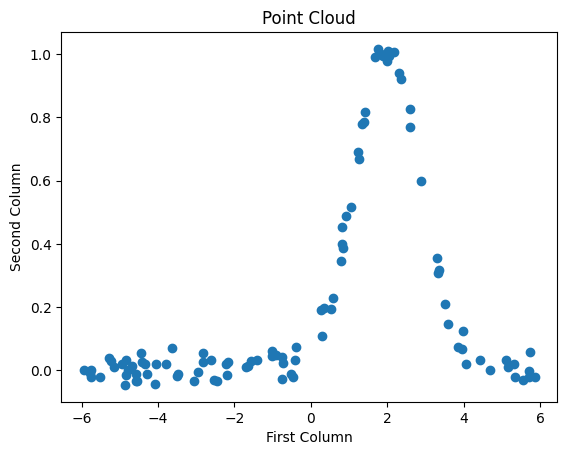

In [4]:
def plot_cloud_point(data):
    x = data[:, 0]  
    y = data[:, 1]

    plt.scatter(x, y)
    plt.xlabel('First Column')
    plt.ylabel('Second Column')
    plt.title('Point Cloud')
    plt.show()

plot_cloud_point(data)

## 3. COMPUTE f(X)

The model is given by

$$
\begin{equation}
m(z; x) = \exp \left( - \frac{(z - x_1)^2}{x_2} \right)
\end{equation}
$$

To find the bell curve that bests fit the data, we will find the parameters x that minimise
the mean squared error :

$$
\begin{equation}
f(x) = \frac{1}{N} \sum_{i=1}^{N} \left( m(z^{(i)}; x) - y^{(i)} \right)^2
\end{equation}
$$

In [5]:
# NOTE: this functionis bivariate so x=[x1,x2]
def m(z,x):
    x1, x2 = x  
    return np.exp(-((z - x1) ** 2) / x2)

def f(x, data):
    N = len(data)
    mse = sum((m(z,x) - y) ** 2 for z, y in data) / N
    return mse

# EVALUATE !!
x1 = np.array([1, 0.5])
x2 = np.array([0.5, 1])

f_x1 = f(x1, data)
f_x2 = f(x2, data)

print(f"f(x = (1, 0.5)) = {f_x1}")
print(f"f(x = (0.5, 1)) = {f_x2}")

f(x = (1, 0.5)) = 0.11204289613814822
f(x = (0.5, 1)) = 0.15009253657239355


## 4. PROOF 

To find the best-fitting bell curve to a dataset, we minimize the mean squared error:

$$
f(x) = \frac{1}{N} \sum_{i=1}^{N} \left( m(z^{(i)}; x) - y^{(i)} \right)^2
$$

with model form:

$$
m(z; x) = \exp\left( -\frac{(z - x_1)^2}{x_2^2} \right)
$$

To minimize f(x), we compute its gradient:

$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right)
$$

Using chain rule:

$$
\frac{\partial}{\partial x_1} \exp\left( -\frac{(z - x_1)^2}{x_2^2} \right) =
\exp\left( -\frac{(z - x_1)^2}{x_2^2} \right) \cdot \frac{2(z - x_1)}{x_2^2}
$$

we can then apply this inside the summation:

$$
\frac{\partial f}{\partial x_1} = \frac{2}{N} \sum_{i=1}^{N} 
\left( \exp \left(-\frac{(z^{(i)} - x_1)^2}{x_2^2} \right) - y^{(i)} \right) 
\frac{z^{(i)} - x_1}{x_2^2}
$$

Similarly, differentiating also with respect to x2:

$$
\frac{\partial}{\partial x_2} \exp\left( -\frac{(z - x_1)^2}{x_2^2} \right) =
\exp\left( -\frac{(z - x_1)^2}{x_2^2} \right) \cdot \left( \frac{2(z - x_1)^2}{x_2^3} \right)
$$

We then end up with:

$$
\frac{\partial f}{\partial x_2} = \frac{2}{N} \sum_{i=1}^{N} 
\left( \exp \left(-\frac{(z^{(i)} - x_1)^2}{x_2^2} \right) - y^{(i)} \right) 
\frac{(z^{(i)} - x_1)^2}{x_2^3}
$$

The full gradient of the mean squared error function is:

$$
\nabla f(x) =
\begin{bmatrix}
\frac{2}{N} \sum_{i=1}^{N} 
\left( \exp \left(-\frac{(z^{(i)} - x_1)^2}{x_2^2} \right) - y^{(i)} \right) 
\frac{z^{(i)} - x_1}{x_2^2} \\
\frac{2}{N} \sum_{i=1}^{N} 
\left( \exp \left(-\frac{(z^{(i)} - x_1)^2}{x_2^2} \right) - y^{(i)} \right) 
\frac{(z^{(i)} - x_1)^2}{x_2^3}
\end{bmatrix}
$$

This concludes the proof given that it is a refactored version of the written formulation of the assignment version


## 5. COMPUTE GRADIENT

In [6]:
def compute_gradient(x, data):
    x1, x2 = x
    N = len(data)
    grad_x1 = sum(2 * (m(z, x) - y) * m(z, x) * (2 * (z - x1) / x2) for z, y in data) / N
    grad_x2 = sum(2 * (m(z, x) - y) * m(z, x) * ((z - x1) ** 2 / x2 ** 2) for z, y in data) / N
    return np.array([grad_x1, grad_x2])

x1 = (1, 0.5)
x2 = (0.5, 1)

grad_x1 = compute_gradient(x1, data)
grad_x2 = compute_gradient(x2, data)

print("Gradient at x = (1, 0.5):", grad_x1)
print("Gradient at x = (0.5, 1):", grad_x2)

Gradient at x = (1, 0.5): [-0.15222549 -0.0578975 ]
Gradient at x = (0.5, 1): [-0.09240185 -0.02646519]


## 6. DEVELOP GRADIENT DESCENT FUNCTION

In [39]:
def gradient_descent(data, x_init, learning_rate=0.1, tol=1e-6, max_iters=1000):
    x = np.array(x_init, dtype=float)
    iter = 0
    for k in range(max_iters):
        grad = compute_gradient(x, data)
        norm_grad = np.linalg.norm(grad)
        print(f"Iteration {k}: x = {x}, f(x) = {f(x, data)}, ||∇f(x)|| = {norm_grad}")
        iter += 1
        
        if norm_grad < tol:
            break
        
        x -= learning_rate * grad
    return x,iter

## 7. TEST GRADIENT DESCENT FUNCTION

In [ ]:
# NOTE : different starting points and different step sizes!!!!
starting_points = [(2, 5),(3, 2), (1, 3), (0.5, 2)]
step_sizes = [0.1, 1, 10, 100]

for i,x0 in enumerate(starting_points):
    print(f"Testing with starting point x0 = {x0}")
    optimized_x,_ = gradient_descent(data, x0, learning_rate=step_sizes[i])
    print("Optimized x:", optimized_x)
    print("-" * 50)

Testing with starting point x0 = (2, 5)
Iteration 0: x = [2. 5.], f(x) = 0.04037643540736778, ||∇f(x)|| = 0.017863549100416338
Iteration 1: x = [2.00115894 4.99864062], f(x) = 0.0403445822912537, ||∇f(x)|| = 0.017799291710764595
Iteration 2: x = [2.00230804 4.99728131], f(x) = 0.04031295742836539, ||∇f(x)|| = 0.017735820258451
Iteration 3: x = [2.00344736 4.99592207], f(x) = 0.04028155721861779, ||∇f(x)|| = 0.017673127983072703
Iteration 4: x = [2.00457699 4.9945629 ], f(x) = 0.04025037811556948, ||∇f(x)|| = 0.017611208130796866
Iteration 5: x = [2.00569699 4.9932038 ], f(x) = 0.040219416625695906, ||∇f(x)|| = 0.017550053955190634
Iteration 6: x = [2.00680744 4.99184478], f(x) = 0.04018866930767093, ||∇f(x)|| = 0.017489658718047748
Iteration 7: x = [2.00790841 4.99048583], f(x) = 0.04015813277165612, ||∇f(x)|| = 0.01743001569021164
Iteration 8: x = [2.00899998 4.98912696], f(x) = 0.04012780367859775, ||∇f(x)|| = 0.01737111815239443
Iteration 9: x = [2.01008222 4.98776816], f(x) = 0.040

__COMMENTS__

- A small step size (α = 0.1 or 1) is ideal for ensuring stable convergence.

- Too large a step size (α = 10 or 100) may cause instability or divergence.

- Starting near the optimal parameters reduces iteration count.

## 8. BELL CURVE WITH OPTIMAL PARAMS

Iteration 0: x = [2. 5.], f(x) = 0.04037643540736778, ||∇f(x)|| = 0.017863549100416338
Iteration 1: x = [2.11589422 4.86406189], f(x) = 0.03778025365492498, ||∇f(x)|| = 0.013484651133016341
Iteration 2: x = [2.1295057  4.72990411], f(x) = 0.035974411188198406, ||∇f(x)|| = 0.013390034812189412
Iteration 3: x = [2.12711873 4.59602504], f(x) = 0.034180542744469876, ||∇f(x)|| = 0.013404051639364398
Iteration 4: x = [2.12283437 4.46205302], f(x) = 0.03238328013058848, ||∇f(x)|| = 0.013411136737417858
Iteration 5: x = [2.11838895 4.32801535], f(x) = 0.03058476320117385, ||∇f(x)|| = 0.013408329778640368
Iteration 6: x = [2.11395495 4.19400538], f(x) = 0.028787752546028625, ||∇f(x)|| = 0.01339398908223033
Iteration 7: x = [2.10954704 4.06013804], f(x) = 0.026995461261970798, ||∇f(x)|| = 0.013366210863453808
Iteration 8: x = [2.10516761 3.9265477 ], f(x) = 0.02521161880355056, ||∇f(x)|| = 0.013322777987618273
Iteration 9: x = [2.10081794 3.79339094], f(x) = 0.023440541290063267, ||∇f(x)|| = 0.0

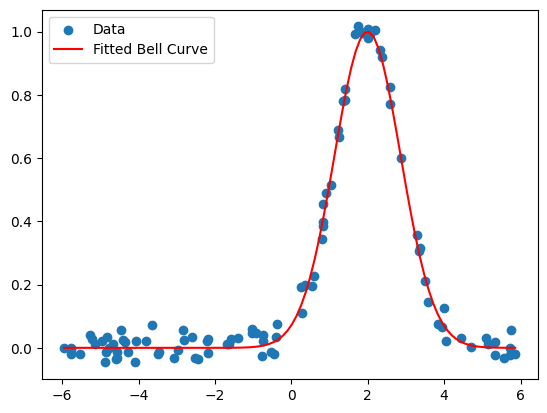

In [ ]:
def plot_bell_curve(optimized_x, data):
    x_values = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
    y_values = [m(z, optimized_x) for z in x_values]
    plt.scatter(data[:, 0], data[:, 1], label="Data")
    plt.plot(x_values, y_values, color='red', label='Fitted Bell Curve')
    plt.legend()
    plt.show() 

optimized_x,_ = gradient_descent(data, (2,5), learning_rate=10)
plot_bell_curve(optimized_x, data)

## 9. LOAD 'DATASET2.CSV'

In [10]:
data2 = np.loadtxt('dataset2.csv', skiprows=2, delimiter=',')
print(data2)

[[-3.510359e+00  2.392850e-01]
 [-9.037740e-01  4.696590e-01]
 [-1.509960e+00  8.302970e-01]
 [-4.370950e-01  1.547330e-01]
 [-2.668456e+00  6.948960e-01]
 [ 1.041412e+00  5.602550e-01]
 [ 4.366267e+00 -1.174000e-02]
 [-4.589618e+00 -3.766000e-03]
 [ 2.085490e-01  9.982100e-02]
 [-4.415183e+00  1.889400e-02]
 [ 2.602316e+00  7.270800e-01]
 [-1.247284e+00  6.910850e-01]
 [ 7.850560e-01  3.895070e-01]
 [-3.800642e+00  1.178000e-01]
 [-4.261827e+00  2.369600e-02]
 [-1.433250e-01  1.033650e-01]
 [-1.732647e+00  9.654370e-01]
 [ 5.285183e+00 -8.242700e-02]
 [ 3.183903e+00  4.514920e-01]
 [ 2.983963e+00  5.361260e-01]
 [ 4.844637e+00 -1.503100e-02]
 [-4.998931e+00 -9.239000e-03]
 [ 6.263100e-01  2.990290e-01]
 [ 1.013713e+00  5.193420e-01]
 [ 5.543237e+00 -6.068900e-02]
 [-2.494230e+00  9.116600e-01]
 [-3.110055e+00  4.364640e-01]
 [-4.796473e+00  3.604800e-02]
 [-5.802844e+00 -2.069600e-02]
 [ 5.154352e+00  4.740700e-02]
 [ 2.038999e+00  1.007577e+00]
 [ 3.421835e+00  2.780910e-01]
 [-2.619

## 10. PLOT POINT CLOUD

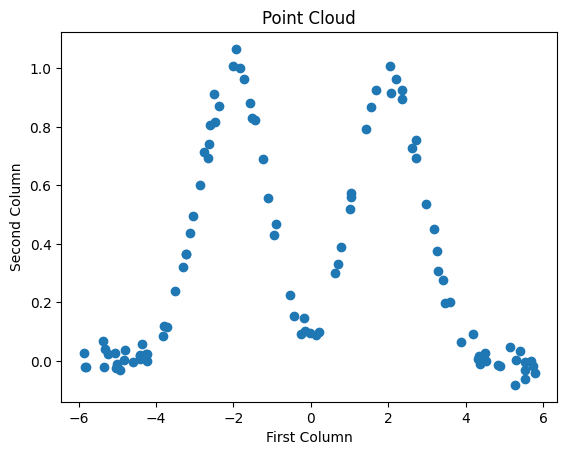

In [11]:
plot_cloud_point(data2)

## 11. RUN GRADIENT WITH STEP SIZE = 10

Iteration 0: x = [0. 5.], f(x) = 0.14135012406053685, ||∇f(x)|| = 0.02009339964311004
Iteration 1: x = [-0.10151616  5.17340398], f(x) = 0.13730944840288017, ||∇f(x)|| = 0.020148950846539244
Iteration 2: x = [-0.22228218  5.33469127], f(x) = 0.13326948213172574, ||∇f(x)|| = 0.0199015297825084
Iteration 3: x = [-0.35636688  5.48175718], f(x) = 0.1293868171674273, ||∇f(x)|| = 0.018997250026586907
Iteration 4: x = [-0.49441374  5.61226624], f(x) = 0.1259301800386551, ||∇f(x)|| = 0.017234877978242916
Iteration 5: x = [-0.62510397  5.72462356], f(x) = 0.12316345569092718, ||∇f(x)|| = 0.014719778272506324
Iteration 6: x = [-0.73818768  5.81885339], f(x) = 0.12119975598348677, ||∇f(x)|| = 0.011856984251267867
Iteration 7: x = [-0.82752697  5.89681042], f(x) = 0.11995206069303106, ||∇f(x)|| = 0.009150018845403488
Iteration 8: x = [-0.89214491  5.96159318], f(x) = 0.1192156728461008, ||∇f(x)|| = 0.006971605531754342
Iteration 9: x = [-0.93494126  6.01662773], f(x) = 0.11878463831815335, ||∇f(x)

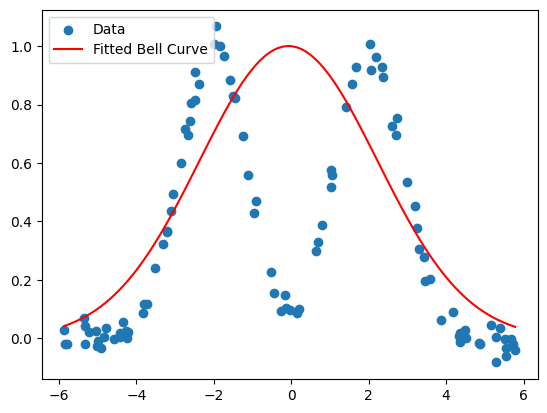

Iteration 0: x = [-1.  1.], f(x) = 0.18395431735259418, ||∇f(x)|| = 0.11191632576370375
Iteration 1: x = [-2.08371425  1.27944557], f(x) = 0.10581170640010046, ||∇f(x)|| = 0.014533434540522232
Iteration 2: x = [-1.9445212   1.32124709], f(x) = 0.10554181240765605, ||∇f(x)|| = 0.013541076486363341
Iteration 3: x = [-2.06950544  1.37335291], f(x) = 0.10533815845642595, ||∇f(x)|| = 0.012298530873743952
Iteration 4: x = [-1.94821869  1.39372231], f(x) = 0.10519008132794669, ||∇f(x)|| = 0.01094074549344008
Iteration 5: x = [-2.05230479  1.42742805], f(x) = 0.10506889983975026, ||∇f(x)|| = 0.009534855691058419
Iteration 6: x = [-1.95756673  1.43820059], f(x) = 0.10498031891199325, ||∇f(x)|| = 0.008198457441557222
Iteration 7: x = [-2.03644657  1.46054876], f(x) = 0.10491112882733016, ||∇f(x)|| = 0.006950154096849484
Iteration 8: x = [-1.96721559  1.46667536], f(x) = 0.1048620394072604, ||∇f(x)|| = 0.005841927772930052
Iteration 9: x = [-2.02368794  1.48163149], f(x) = 0.10482568695100644, ||

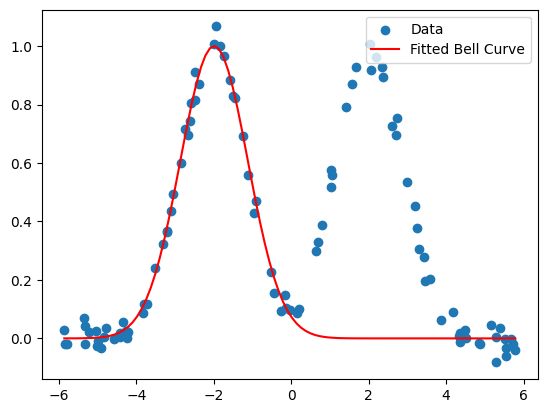

Iteration 0: x = [1. 1.], f(x) = 0.1990342075395109, ||∇f(x)|| = 0.09307686340636893
Iteration 1: x = [1.89744464 1.24682658], f(x) = 0.13452863059804931, ||∇f(x)|| = 0.016321196313797463
Iteration 2: x = [2.04039009 1.32559678], f(x) = 0.13352015995482439, ||∇f(x)|| = 0.008603081410078975
Iteration 3: x = [1.96999041 1.3750456 ], f(x) = 0.13314261659379106, ||∇f(x)|| = 0.005070791717080221
Iteration 4: x = [1.99759011 1.4175844 ], f(x) = 0.1329669898243487, ||∇f(x)|| = 0.003514569504332447
Iteration 5: x = [1.98284172 1.44948589], f(x) = 0.13286587117769005, ||∇f(x)|| = 0.0027005847392469196
Iteration 6: x = [1.98700007 1.47616966], f(x) = 0.1328014919494827, ||∇f(x)|| = 0.002179949967738286
Iteration 7: x = [1.98347405 1.49768211], f(x) = 0.13275842150895129, ||∇f(x)|| = 0.0017978794939125333
Iteration 8: x = [1.98347057 1.5156609 ], f(x) = 0.13272884379492372, ||∇f(x)|| = 0.001499121065312468
Iteration 9: x = [1.98224133 1.53060163], f(x) = 0.1327081875078877, ||∇f(x)|| = 0.00125881

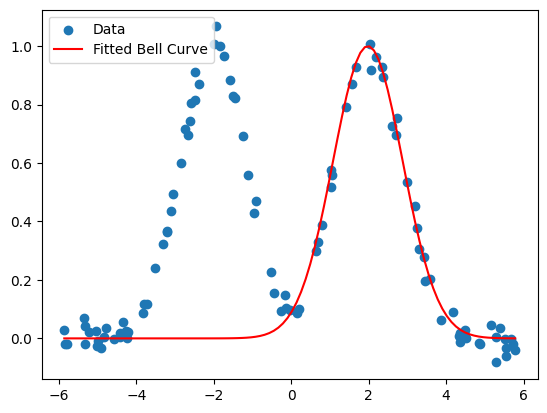

In [26]:
starting_points = [(0, 5), (-1, 1), (1, 1)]

for x0 in starting_points:
    optimized_x,_ = gradient_descent(data2, x0, learning_rate=10)
    plot_bell_curve(optimized_x, data2)

- x(0) = (0,5)

x2 intially is very high, this could lead to a wider initial bell curve. The descennt converges may take long but converges in smooth way.

- x(0) = (-1,1)

Since x₁ startz at a negative value, the optimization shifts the bell curve to the right as it converges. it could converge faster but we need to pay attention to the learning rate

- x(0) = (1,1)

This likely leads to faster convergence. The gradient should correct the position slightly while refining the spread of the bell curve.

In general, starting points with very small or large x₂ canimpact stability, choosing a good step size is crucial.

## 12. PLOT 3D

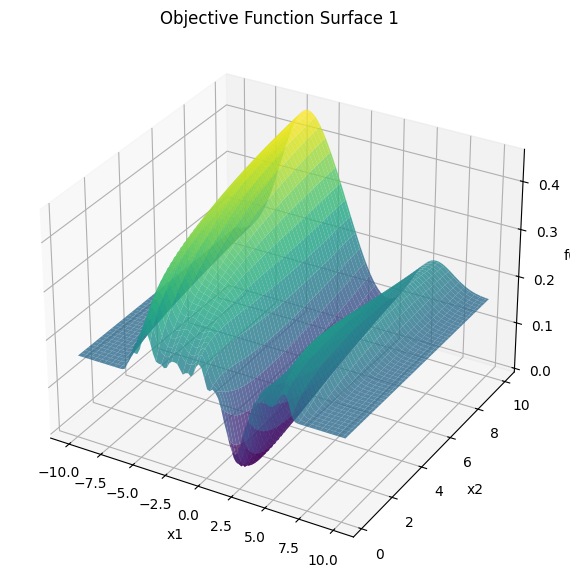

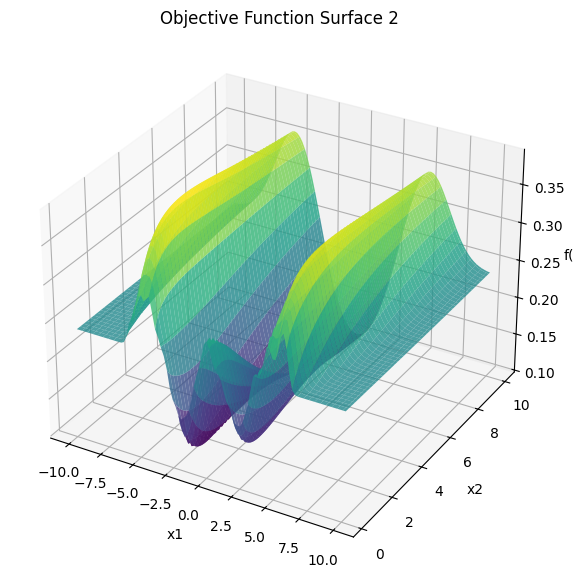

In [13]:
def plot_objective_function(data, dataset_num, x_range=(-10, 10), x2_range=(0.2, 10)):
    X1 = np.linspace(x_range[0], x_range[1], 100)
    X2 = np.linspace(x2_range[0], x2_range[1], 100)
    X1, X2 = np.meshgrid(X1, X2)
    Z = np.array([[f((x1, x2), data) for x1, x2 in zip(row_x1, row_x2)] for row_x1, row_x2 in zip(X1, X2)])
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x)')
    ax.set_title(f'Objective Function Surface {dataset_num}')
    plt.show()

plot_objective_function(data,1)
plot_objective_function(data2,2)

# __*PROBLEM 2*__

In [27]:
def bivariate_f(x):
    x1,x2 = x
    return 100*(x2-(x1**2))**2 + (x1 -1)**2

In [32]:
def grad_f(x):
    x1, x2 = x
    df_dx1 = 2 * (x1 - 1) - 400 * x1 * (x2 - x1**2)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

def hessian_f(x):
    x1, x2 = x
    d2f_dx2 = -400*(x2 - x1**2) + 800*x1**2 + 2
    d2f_dxdy = -400 * x1
    d2f_dy2 = 200
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

def newton_method(x_init, tol=1e-6, max_iters=100):
    x = np.array(x_init, dtype=float)
    for i in range(max_iters):
        grad = grad_f(x)
        hessian = hessian_f(x)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:
            return x, i
        step = np.linalg.solve(hessian, grad)
        x -= step
    return x, max_iters

In [40]:
starting_points = [(2, 2)]
x_init = (2, 5)

opt_gd, iters_gd = gradient_descent(data, x0, learning_rate=0.1)
opt_newton, iters_newton = newton_method(x0)

print(f"Gradient Descent: Minimum at {opt_gd}, Iterations: {iters_gd}")
print(f"Newton's Method: Minimum at {opt_newton}, Iterations: {iters_newton}")

Iteration 0: x = [2. 2.], f(x) = 0.0029713312011325488, ||∇f(x)|| = 0.008925464863549877
Iteration 1: x = [2.00050057 1.99926103], f(x) = 0.0029633907941434405, ||∇f(x)|| = 0.008867473905733171
Iteration 2: x = [2.00099242 1.9985232 ], f(x) = 0.0029555528246747527, ||∇f(x)|| = 0.008810780060694986
Iteration 3: x = [2.00147569 1.99778648], f(x) = 0.0029478143578096122, ||∇f(x)|| = 0.008755355898692443
Iteration 4: x = [2.00195052 1.99705089], f(x) = 0.0029401725500721133, ||∇f(x)|| = 0.008701174354748358
Iteration 5: x = [2.00241705 1.99631641], f(x) = 0.00293262464661634, ||∇f(x)|| = 0.008648208730647986
Iteration 6: x = [2.0028754  1.99558304], f(x) = 0.0029251679784995104, ||∇f(x)|| = 0.008596432696788048
Iteration 7: x = [2.00332571 1.99485078], f(x) = 0.002917799960036928, ||∇f(x)|| = 0.008545820293868849
Iteration 8: x = [2.0037681  1.99411961], f(x) = 0.0029105180862362833, ||∇f(x)|| = 0.008496345934420599
Iteration 9: x = [2.00420269 1.99338954], f(x) = 0.002903319930309083, ||∇

It is possible to see that the gradient descent takes up to 1000 iterations to converge while instead newton's method only 5!! 

We can say that Newton's method is better than gradient in this scenario and normally in general, though it is more expensive given the fact that calculating the Hessian takes up a lot of computational power.

# __*PROBLEM 3*__

## 1. DEFINE FUNCTION AND EVALUATE AT (0,0)

In [45]:
def second_biv(x):
    x1,x2 = x
    return 4*x1**2 - 3*x1 + x2**2 + 2*x2

x = (0,0)
res = second_biv(x)
print(f'The res is {res}')

The res is 0


## 2. COMPUTE GRADIENT

In [47]:
def comp_grad(x):
    x1, x2 = x
    df1 = 8*x1 - 3
    df2 = 2*x2 + 2
    return np.array([df1, df2])

x = (0,0)
print(f"gradient: {comp_grad(x,)}")

gradient: [-3  2]


## 3. COMPUTE HEASSIAN

In [49]:
def hessian(x):
    df1_df1 = 8
    df1_df2 = 0
    df2_df2 = 2
    return np.array([[df1_df1,df1_df2], [df1_df2,df2_df2]])

x = (0,0)
print(f"Hessian = {hessian(x)}")

Hessian = [[8 0]
 [0 2]]


## 4. NEWTON DIRECTION

In [54]:
def newton_direction(x):
    H = hessian(x)   
    g = comp_grad(x)      
    direction = np.linalg.solve(H, -g)  
    return direction

def check_descent_direction(x):
    direction = newton_direction(x)
    g = comp_grad(x)

    dir = np.dot(g, direction) 
    print(f"Newton's direction at x0: {direction}")
    print(f"dir = {dir}")

    if dir < 0:
        print("Newton's direction is a descent direction.")
    else:
        print("Newton's direction is NOT a descent direction.")

x = (0, 0)
check_descent_direction(x)

Newton's direction at x0: [ 0.375 -1.   ]
dir = -3.125
Newton's direction is a descent direction.


## 5. DEFINE LINE_SEARCH

In [57]:
def line_search(alpha, x, direction, f):
    return f(x + alpha * direction)

## 6. PLOT GRAPH

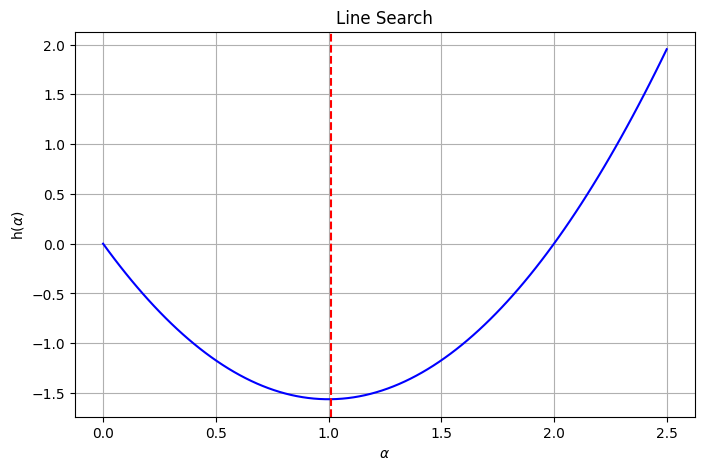

Approximate optimal alpha from plot: 1.0101010101010102


In [81]:
x = (0, 0)  
direction = newton_direction(x)  

alpha_values = np.linspace(0, 2.5, 100)
h_values = [line_search(alpha, x0, direction, second_biv) for alpha in alpha_values]

plt.figure(figsize=(8, 5))
plt.plot(alpha_values, h_values, color='b')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"h($\alpha$)")
plt.title("Line Search")
plt.axvline(alpha_values[np.argmin(h_values)], color='r', linestyle="--",)
plt.grid()
plt.show()

optimal_alpha = alpha_values[np.argmin(h_values)]
print(f"Approximate optimal alpha from plot: {optimal_alpha}")

## 7. DEFINE FIRST_WOLFE

In [80]:
def first_wolfe(x, alpha, dir, f, grad, relaxation=0.2):
    f_x0 = f(x)
    grad_x0 = grad(x)
    return f_x0 + alpha * relaxation * np.dot(grad_x0, dir)

## 8. PLOT GRAPH FOR WOLFE

Approximate α satisfying Wolfe condition: 1.5999999999999996


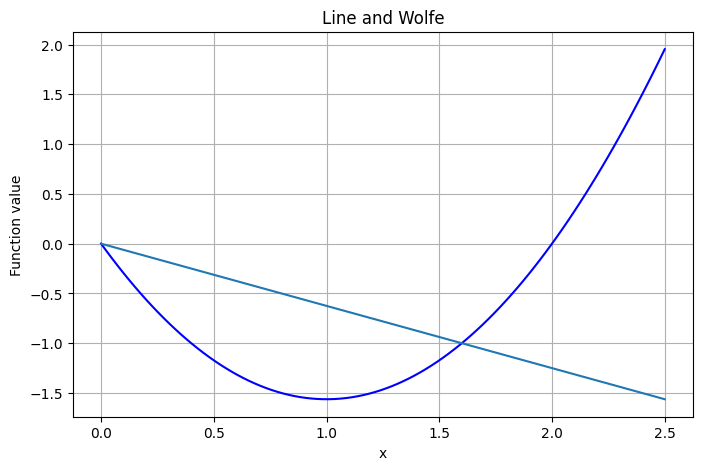

In [90]:
x = (0,0)
direction = newton_direction(x)

alpha_values = np.linspace(0, 2.5, 100)
first_values = [first_wolfe(x, a, direction, second_biv, comp_grad) for a in alpha_values]

plt.figure(figsize=(8, 5))
plt.plot(alpha_values, h_values, color='b')
plt.plot(alpha_values, first_values)
plt.xlabel("x")
plt.ylabel("Function value")
plt.title("Line and Wolfe")
plt.grid()

def intersection(alpha):
    line = line_search(alpha, x0, direction, second_biv)
    wolfe = first_wolfe(x0, alpha, direction, second_biv, comp_grad)
    return line - wolfe

alpha_good = fsolve(intersection, 1.0)[0]

print(f"Approximate α satisfying Wolfe condition: {alpha_good}")

## 9. SECOND WOLFE

The second wolfe condition is the following:


$$
\nabla f (x(0) + \alpha d_N )^T d_N \geq \bar{\eta} \nabla f (x(0) )^T d_N
$$

with $$ \bar{\eta} = 0.7.$$

Rearranging the inequality we end up with the following:

$$
\frac{\nabla f (x(0) + \alpha d_N )^T d_N}{\nabla f (x(0) )^T d_N} \leq \bar{\eta}
$$

Where we simply brought the all denominator that before was a numerator on the other side. Given the sign of the expression, we change the inequality sign. This proves its equivalence


In [87]:
def second_wolfe(x, alpha, direction, grad):
    grad_x0 = grad(x)  
    grad_new = grad(x + alpha * direction)  
    return np.dot(grad_new, direction) / np.dot(grad_x0, direction)

## 10. PLOT GRAPH

Approximate α satisfying Wolfe condition: 0.4 with an eta_bar of 0.6


/tmp/ipykernel_65609/667820294.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


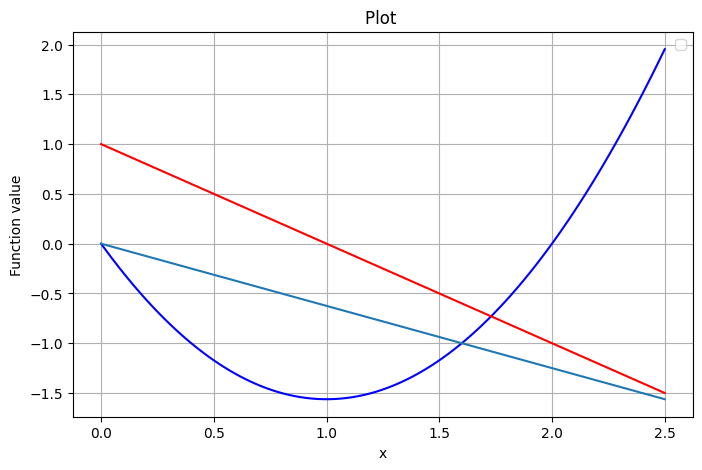

In [97]:
x = (0,0)
direction = newton_direction(x)

alpha_values = np.linspace(0, 2.5, 100)
second_values = [second_wolfe(x, a, direction, comp_grad) for a in alpha_values]

plt.figure(figsize=(8, 5))
plt.plot(alpha_values, h_values, color='b')
plt.plot(alpha_values, first_values,)
plt.plot(alpha_values, second_values, color='r')
plt.xlabel("x")
plt.ylabel("Function value")
plt.title("Plot ")
plt.legend()
plt.grid()

eta_bar = 0.6
def intersection_second(alpha):
    return second_wolfe(x0, alpha, direction, comp_grad) - eta_bar

alpha_good_second = fsolve(intersection_second, 1.0)[0] 
print(f"Approximate α satisfying Wolfe condition: {alpha_good_second} with an eta_bar of {eta_bar}")